In [1]:
import datetime

x = datetime.datetime.now()
print(x)

2019-01-29 12:48:16.753686


In [2]:
import datetime

x = datetime.datetime(2020, 5, 17)

print(x)

2020-05-17 00:00:00


In [3]:
import calendar

cal = calendar.month(2008, 4)
print ("Here is the calendar:")
print (cal)

Here is the calendar:
     April 2008
Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6
 7  8  9 10 11 12 13
14 15 16 17 18 19 20
21 22 23 24 25 26 27
28 29 30



In [4]:
import calendar

cal = calendar.month(2014, 8)
print ("Here is the calendar:")
print (cal)

Here is the calendar:
    August 2014
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30 31



Working with dates and times in pandas

In [5]:
import pandas as pd
import numpy as np
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [6]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [7]:
# 5 characters from the end to 3 characters from the end
ufo.Time.str.slice(-5, -3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [8]:
# we will convert the Time column to datatime format
# there are many options to ensure this works well with your data
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.head()

City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  
0 1930-06-01 22:00:00  
1 1930-06-30 20:00:00  
2 1931-02-15 14:00:00  
3 1931-06-01 13:00:00  
4 1933-04-18 19:00:00

In [9]:
ufo.dtypes #notice Time data type has changed

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [10]:
ufo.Time.dt.hour.head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int64

In [11]:
ufo.Time.dt.weekday_name.head()

0     Sunday
1     Monday
2     Sunday
3     Monday
4    Tuesday
Name: Time, dtype: object

In [12]:
ufo.Time.dt.weekday.head()

0    6
1    0
2    6
3    0
4    1
Name: Time, dtype: int64

In [13]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

Timestamps 
We can use it for comparison and mathematical operations

In [14]:
ts = pd.to_datetime('1/1/1999')

In [15]:
ufo.loc[ufo.Time >= ts, :].head()

City Colors Reported Shape Reported State  \
12832          Loma Rica             NaN          LIGHT    CA   
12833            Bauxite             NaN            NaN    AR   
12834           Florence             NaN       CYLINDER    SC   
12835       Lake Henshaw             NaN          CIGAR    CA   
12836  Wilmington Island             NaN          LIGHT    GA   

                     Time  
12832 1999-01-01 02:30:00  
12833 1999-01-01 03:00:00  
12834 1999-01-01 14:00:00  
12835 1999-01-01 15:00:00  
12836 1999-01-01 17:15:00

In [16]:
ufo['Year'] = ufo.Time.dt.year
ufo.head()



City Colors Reported Shape Reported State  \
0                Ithaca             NaN       TRIANGLE    NY   
1           Willingboro             NaN          OTHER    NJ   
2               Holyoke             NaN           OVAL    CO   
3               Abilene             NaN           DISK    KS   
4  New York Worlds Fair             NaN          LIGHT    NY   

                 Time  Year  
0 1930-06-01 22:00:00  1930  
1 1930-06-30 20:00:00  1930  
2 1931-02-15 14:00:00  1931  
3 1931-06-01 13:00:00  1931  
4 1933-04-18 19:00:00  1933

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

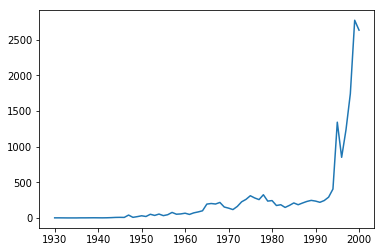

In [18]:
ufo.Year.value_counts().sort_index().plot()

Using "inplace" parameter

In [19]:
url = 'http://bit.ly/uforeports'
ufo = pd.read_csv(url)
ufo.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [20]:
ufo.shape

(18241, 5)

In [21]:
# dropping column
ufo.drop('State', axis=1).head()

City Colors Reported Shape Reported             Time
0                Ithaca             NaN       TRIANGLE   6/1/1930 22:00
1           Willingboro             NaN          OTHER  6/30/1930 20:00
2               Holyoke             NaN           OVAL  2/15/1931 14:00
3               Abilene             NaN           DISK   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT  4/18/1933 19:00

In [22]:
# you can see that the state column is not gone 
# drop() method has inplace=False as default
ufo.head() 

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [23]:
# you want to change to inplace=True to affect the underlying data
ufo.drop('City', axis=1, inplace=True)

In [24]:
# dropna with how='any' would drop any row with 'NaN'
ufo.dropna(how='any').shape

(2490, 4)

In [25]:
ufo.shape
# as you can see, we lose a lot of rows because of dropna
# but the underlying data has not been affected because inplace=False for .dropna()

(18241, 4)

In [26]:
# some examples with inplace=False
# most are set to False

# ufo.set_index()
# ufo.rename()